<a href="https://colab.research.google.com/github/RizkyAkbarHalim/UTS/blob/main/Rizky_Akbar_Halim_4212201050.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
from skimage.feature import hog
from sklearn import datasets
from sklearn.preprocessing import LabelBinarizer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [8]:
# Load the dataset (replace with your actual file path)
train_data = pd.read_csv('/content/emnist-bymerge-train.csv', header=None)
test_data = pd.read_csv('/content/emnist-bymerge-test.csv', header=None)
l = train_data[0].head(36000)
d = train_data.drop(0, axis=1).head(36000)
lt = test_data[0]
dt = test_data.drop(0, axis=1)

In [10]:
print(d.shape)
print(l.shape)
print(dt.shape)
print(lt.shape)

(4870, 784)
(4870,)
(5959, 784)
(5959,)


In [11]:
hog_features_train = []
for image in d.values:
    fd = hog(image.reshape(28, 28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
    hog_features_train.append(fd)
hog_features_train = np.array(hog_features_train)

In [12]:
hog_features_test = []
for image in dt.values:
    fd = hog(image.reshape(28, 28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
    hog_features_test.append(fd)
hog_features_test = np.array(hog_features_test)

In [13]:
lb = LabelBinarizer()
lb.fit(l)
y_train = l.values
y_test = lt.values

In [14]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Replace 'mean' with 'median' or 'most_frequent' as needed
hog_features_train = imputer.fit_transform(hog_features_train)


In [15]:
clf_svm = SVC(kernel='linear', probability=True)
clf_svm.fit(hog_features_train, y_train)

SVC(kernel='linear', probability=True)

In [16]:
hog_features_test = imputer.transform(hog_features_test)


In [17]:
y_pred_svm = clf_svm.predict(hog_features_test)
print(y_test)
print(y_pred_svm)

[24 22 28 ... 24  3 19]
[ 0  4 28 ... 24  3  8]


In [18]:
# SVM Classifier Performance
conf_mat_svm = confusion_matrix(y_test, y_pred_svm)
print('SVM Confusion Matrix:\n', conf_mat_svm)

SVM Confusion Matrix:
 [[206   1   0 ...   0   0   0]
 [  1 311   2 ...   0   0   0]
 [  0   0 249 ...   0   0   0]
 ...
 [  0   0   3 ...   0   0   0]
 [  0   0   0 ...   0 101   6]
 [  0   0   0 ...   0   0 108]]


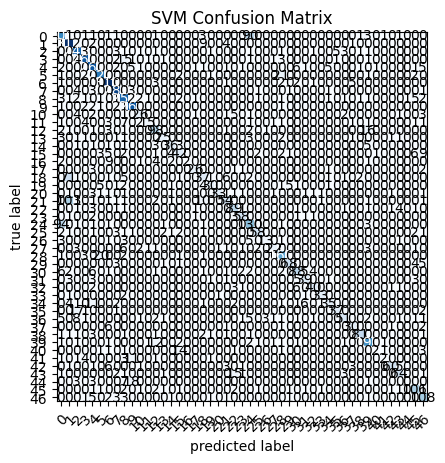

In [19]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_svm, class_names=lb.classes_)
plt.title('SVM Confusion Matrix')
plt.show()

In [22]:
precision_svm = precision_score(y_test, y_pred_svm, average=None)
recall_svm = recall_score(y_test, y_pred_svm, average=None)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='macro')
print(f'SVM Precision: {precision_svm}, Recall: {recall_svm}, Accuracy: {accuracy_svm}, F1 Score: {f1_svm}')

SVM Precision: [0.60946746 0.61829026 0.81372549 0.91724138 0.81515152 0.87007874
 0.87570621 0.90880503 0.77639752 0.86688312 0.68421053 0.78947368
 0.73684211 0.75757576 0.76595745 0.5915493  1.         0.83870968
 0.52112676 0.81081081 0.94285714 0.69230769 0.7295082  0.84057971
 0.52845528 0.87878788 0.76470588 0.81481481 0.78947368 0.88311688
 0.77876106 0.70909091 0.81632653 0.89189189 0.76086957 0.86046512
 0.80952381 0.73170732 0.93103448 0.8212766  0.5        0.4
 0.90909091 0.8        0.         0.7890625  0.69677419], Recall: [0.66237942 0.94242424 0.91544118 0.8956229  0.88778878 0.88047809
 0.95384615 0.95379538 0.88967972 0.96389892 0.55319149 0.38461538
 0.77777778 0.625      0.70588235 0.53846154 0.0952381  0.76470588
 0.28682171 0.58823529 0.66       0.30337079 0.83962264 0.85294118
 0.55793991 0.76315789 0.48148148 0.5        0.85492228 0.82926829
 0.72727273 0.69642857 0.74074074 0.86842105 0.53846154 0.63793103
 0.5862069  0.73170732 0.85263158 0.88127854 0.08      